# Reading data

In [82]:
import pandas as pd
dates = pd.date_range(start='1/1/2021', periods=118)
raw_df_productdistributionset = pd.read_csv('product_distribution_training_set.txt',sep="\t",header=None)
raw_set=raw_df_productdistributionset.transpose()
raw_set.columns=raw_set.iloc[0]
raw_set = raw_set[1:]
raw_set.columns = raw_set.columns.astype(str)
raw_set.index = dates
raw_set.index.name = 'dates'
raw_set

,1,4,5,6,10,11,13,15,18,19,...,716,720,801,829,848,865,922,949,962,964
dates,,,,,,,,,,,,,,,,,,,,,
2021-01-01,53,0,57,108,0,17,2,38,43,62,...,0,1,2,2,0,0,0,0,1,0
2021-01-02,40,0,133,130,0,22,31,54,40,70,...,1,1,0,5,0,0,0,1,4,1
2021-01-03,37,2,60,143,2,16,13,38,52,75,...,3,3,2,7,0,0,0,2,2,0
2021-01-04,45,4,126,92,0,15,4,45,55,68,...,0,1,2,0,0,0,0,1,2,0
2021-01-05,69,0,90,88,4,45,18,50,72,41,...,0,4,6,0,0,0,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-24,97,36,5,0,7,16,32,19,1,0,...,2,6,0,0,1,5,1,1,1,4
2021-04-25,25,17,24,5,28,14,13,24,9,0,...,0,3,3,0,3,2,2,0,1,2
2021-04-26,45,14,12,16,13,12,7,18,3,14,...,0,2,1,1,6,0,1,0,0,1


# Splitting data (train,test)

In [83]:
train = raw_set.iloc[:100]
test = raw_set.iloc[100:]
trainset_sum = train.sum(axis=1)
testset_sum = test.sum(axis=1)

# Trend and Seasonality plots

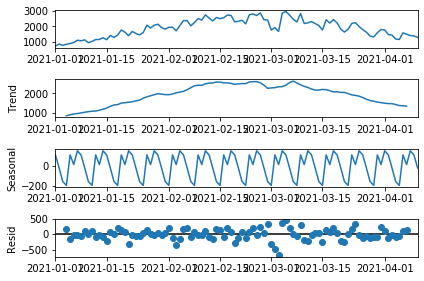

In [84]:
# raw_set_sum = raw_set.sum(axis=1)
# raw_set_sum.plot()
import statsmodels.api as sm
from matplotlib import pyplot as plt 
seas_d=sm.tsa.seasonal_decompose(trainset_sum,model='add',period=7);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

# differenced plot to make the data stationary


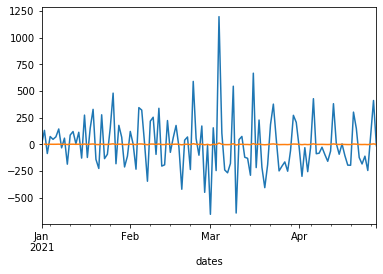

In [102]:
dif_raw = raw_set.diff(periods=1)
dif_raw_sum=dif_raw.sum(axis=1)
dif_raw_sum.plot()
dif_raw.mean(axis=1).plot()

# ACF and PACF Plots

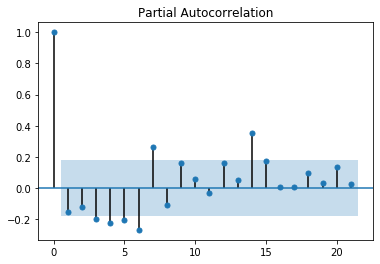

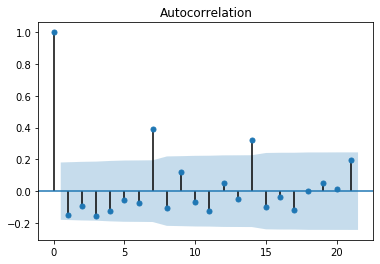

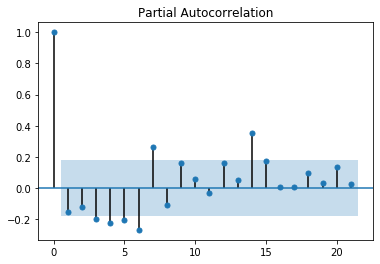

In [86]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(dif_raw_sum)
plot_pacf(dif_raw_sum)

# Auto ARIMA for best pdq values for the fit

In [87]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train.sum(axis=1),start_p=0, start_q=0,start_P=0,start_Q=0,max_P=5,max_Q=5, D=1,max_D=2,
 max_p=5, max_q=5, d=1, max_d=2,m=7,trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1320.064, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1303.244, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=1285.031, Time=0.14 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=1319.973, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=1286.139, Time=0.21 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=1302.454, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=1288.119, Time=0.42 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=1286.582, Time=0.16 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=1281.778, Time=0.18 sec
 ARIMA(0,1,2)(0,1,0)[7]             : AIC=1307.885, Time=0.10 sec
 ARIMA(0,1,2)(1,1,1)[7]             : AIC=1283.239, Time=0.29 sec
 ARIMA(0,1,2)(0,1,2)[7]             : AIC=1283.300, Time=0.35 sec
 ARIMA(0,1,2)(1,1,0)[7]             : AIC=1

# Seasonal AutoregRegressive Integrated Moving Average model(SARIMA)

In [89]:
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
col_names = raw_set.columns
results_df = pd.DataFrame()
for i in range(100):
    c1 = raw_set.iloc[:,i]
    c1_train = c1[:100]
    c1_test = c1[100:]
    model = mod = sm.tsa.st      atespace.SARIMAX(c1_train,order=(2,1,2),seasonal_order=(0,1,1,7),enforce_stationarity=False,enforce_invertibility=False)
    results_ARIMA = model.fit(disp=0)
    fc1 = results_ARIMA.forecast(steps = 18)
    fc1 = pd.Series(fc1).round()
    fc1.index = c1_test.index
    results_df.insert(i,col_names[i],fc1,allow_duplicates=True)

# Plotting original data(orange) and predicted data(blue)

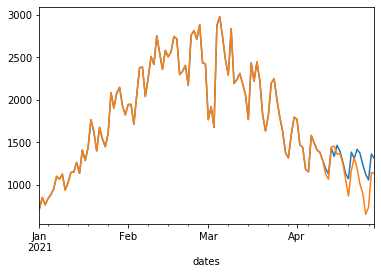

In [103]:
pd.concat([train,results_df]).sum(axis=1).plot()
raw_set.sum(axis=1).plot()

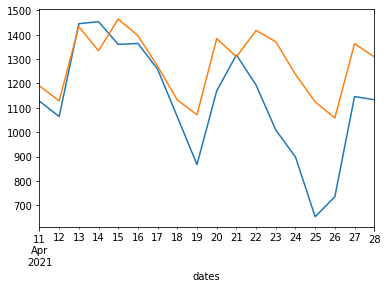

In [95]:
#Plotting predicted data only for zoomed look
test.sum(axis=1).plot()
results_df.sum(axis=1).plot()

# Making Negative values to zero

In [93]:
results_df[results_df<0]=0
results_df

,1,4,5,6,10,11,13,15,18,19,...,716,720,801,829,848,865,922,949,962,964
dates,,,,,,,,,,,,,,,,,,,,,
2021-04-11,55.0,51.0,17.0,12.0,14.0,60.0,29.0,27.0,7.0,2.0,...,3.0,2.0,3.0,2.0,8.0,5.0,4.0,1.0,1.0,3.0
2021-04-12,28.0,15.0,29.0,21.0,0.0,54.0,15.0,22.0,4.0,5.0,...,2.0,3.0,4.0,1.0,7.0,7.0,4.0,2.0,0.0,3.0
2021-04-13,77.0,39.0,24.0,21.0,36.0,64.0,21.0,22.0,8.0,3.0,...,3.0,4.0,4.0,2.0,6.0,4.0,4.0,2.0,-0.0,4.0
2021-04-14,58.0,0.0,15.0,12.0,30.0,56.0,9.0,27.0,0.0,12.0,...,3.0,5.0,5.0,2.0,7.0,6.0,5.0,2.0,1.0,2.0
2021-04-15,78.0,26.0,15.0,17.0,28.0,53.0,22.0,26.0,5.0,9.0,...,4.0,5.0,6.0,3.0,7.0,6.0,4.0,3.0,-0.0,2.0
2021-04-16,55.0,17.0,19.0,15.0,26.0,58.0,21.0,31.0,8.0,4.0,...,3.0,5.0,3.0,2.0,7.0,5.0,5.0,1.0,1.0,3.0
2021-04-17,52.0,16.0,20.0,14.0,19.0,54.0,2.0,19.0,3.0,0.0,...,3.0,4.0,3.0,2.0,6.0,5.0,4.0,1.0,-0.0,3.0
2021-04-18,40.0,32.0,6.0,6.0,11.0,49.0,14.0,18.0,0.0,0.0,...,2.0,3.0,3.0,1.0,7.0,6.0,4.0,1.0,0.0,3.0
2021-04-19,18.0,2.0,15.0,12.0,0.0,52.0,5.0,15.0,3.0,-0.0,...,2.0,3.0,5.0,1.0,7.0,6.0,4.0,2.0,-0.0,3.0


# Predictions for the whole dataset


In [69]:
#In the similar way
#Auto ARIMA for best pdq values for the fit
from pmdarima.arima import auto_arima
step_wise=auto_arima(raw_set.sum(axis=1),start_p=0, start_q=0,start_P=0,start_Q=0,max_P=5,max_Q=5, D=1,max_D=2,
 max_p=5, max_q=5, d=1, max_d=2,m=7,trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1560.973, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1540.185, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=1517.744, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=1560.523, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=1519.050, Time=0.50 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=1539.224, Time=0.14 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=1520.292, Time=0.13 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=1512.181, Time=0.31 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=1543.644, Time=0.12 sec
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=1513.709, Time=0.30 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=1513.750, Time=0.66 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=1525.729, Time=0.23 sec
 ARIMA(1,1,1)(1,1,2)[7]             : AIC=i

# 29-day Forecast

In [97]:
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
output_df = pd.DataFrame()
for i in range(100):
    c1 = raw_set.iloc[:,i]
    model = mod = sm.tsa.statespace.SARIMAX(c1,order=(1,1,1),seasonal_order=(0,1,1,7),enforce_stationarity=False,enforce_invertibility=False)
    results_ARIMA = model.fit(disp=0)
    forcast_results = results_ARIMA.forecast(steps = 29)
    forcast_results = pd.Series(forcast_results).round()
    output_df.insert(i,i,forcast_results,allow_duplicates=True)

In [98]:
output_df[output_df<0]=0
output_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2021-04-29,86.0,22.0,11.0,8.0,20.0,14.0,22.0,28.0,7.0,5.0,...,3.0,5.0,4.0,2.0,6.0,5.0,4.0,2.0,-0.0,2.0
2021-04-30,73.0,15.0,15.0,5.0,22.0,25.0,23.0,34.0,10.0,3.0,...,2.0,5.0,2.0,1.0,6.0,4.0,6.0,0.0,1.0,2.0
2021-05-01,72.0,18.0,17.0,6.0,15.0,21.0,14.0,21.0,5.0,0.0,...,2.0,4.0,2.0,1.0,3.0,4.0,3.0,0.0,0.0,3.0
2021-05-02,55.0,31.0,5.0,0.0,11.0,13.0,18.0,20.0,0.0,0.0,...,1.0,3.0,2.0,1.0,4.0,4.0,4.0,0.0,0.0,2.0
2021-05-03,42.0,11.0,14.0,4.0,0.0,17.0,7.0,17.0,2.0,0.0,...,1.0,3.0,3.0,0.0,5.0,4.0,3.0,1.0,-0.0,2.0
2021-05-04,90.0,22.0,13.0,7.0,24.0,25.0,23.0,21.0,7.0,0.0,...,2.0,4.0,3.0,1.0,5.0,5.0,4.0,1.0,0.0,4.0
2021-05-05,73.0,0.0,6.0,-0.0,20.0,27.0,10.0,24.0,0.0,7.0,...,2.0,5.0,3.0,2.0,5.0,5.0,5.0,1.0,1.0,3.0
2021-05-06,88.0,15.0,5.0,2.0,20.0,12.0,19.0,26.0,3.0,3.0,...,3.0,5.0,4.0,2.0,6.0,5.0,5.0,2.0,-0.0,2.0
2021-05-07,73.0,7.0,10.0,0.0,20.0,21.0,20.0,31.0,7.0,0.0,...,2.0,5.0,2.0,1.0,6.0,4.0,6.0,0.0,1.0,2.0
2021-05-08,72.0,10.0,12.0,0.0,12.0,17.0,11.0,18.0,2.0,0.0,...,2.0,4.0,2.0,1.0,4.0,4.0,3.0,0.0,0.0,2.0


In [100]:
final_output = output_df.transpose()

In [101]:
final_output

,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-08,...,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27
0,86.0,73.0,72.0,55.0,42.0,90.0,73.0,88.0,73.0,72.0,...,90.0,72.0,88.0,73.0,72.0,55.0,42.0,90.0,72.0,88.0
1,22.0,15.0,18.0,31.0,11.0,22.0,0.0,15.0,7.0,10.0,...,7.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
2,11.0,15.0,17.0,5.0,14.0,13.0,6.0,5.0,10.0,12.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,5.0,6.0,0.0,4.0,7.0,-0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.0,22.0,15.0,11.0,0.0,24.0,20.0,20.0,20.0,12.0,...,18.0,14.0,14.0,14.0,7.0,3.0,0.0,16.0,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0
96,4.0,6.0,3.0,4.0,3.0,4.0,5.0,5.0,6.0,3.0,...,5.0,5.0,5.0,6.0,3.0,4.0,3.0,5.0,5.0,5.0
97,2.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
98,-0.0,1.0,0.0,0.0,-0.0,0.0,1.0,-0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,0.0
